# Customer Segmentation analysis and strategy improvement for retail Bussiness

In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for better visuals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv(r"C:\Users\Saurav Kumar\python files\UPWORK PROJECTS\Customer segmentation\archive\customer_segmentation.csv",encoding='ISO-8859-1')


# Display the first few rows
df.head()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


Data cleaning and pre processing

In [4]:
# Check for missing values


# Drop the index column if it exists (safety check)
if 'index' in df.columns:
    df.drop('index', axis=1, inplace=True)

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Filter out returns and invalid data (Quantity and UnitPrice must be > 0)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Reset index
df.reset_index(drop=True, inplace=True)

# we dont have any missing values in the dataset

# Check the result
print("✅ Data cleaned successfully. Remaining rows:", len(df))
df.head()


✅ Data cleaned successfully. Remaining rows: 397884


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [5]:
# Drop missing descriptions or CustomerID (optional for visualization clarity)
df = df.dropna(subset=['Description', 'CustomerID'])

# Remove canceled orders (those with InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Ensure Quantity and UnitPrice are positive
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Add TotalAmount column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [6]:
# Optional: rename Description column for clarity
df = df.rename(columns={'Description': 'Product'})


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Product      397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalAmount  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.3+ MB


Exploratory Data Analysis (EDA) & Visualization

Top Selling Products

C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_11312\4122446795.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


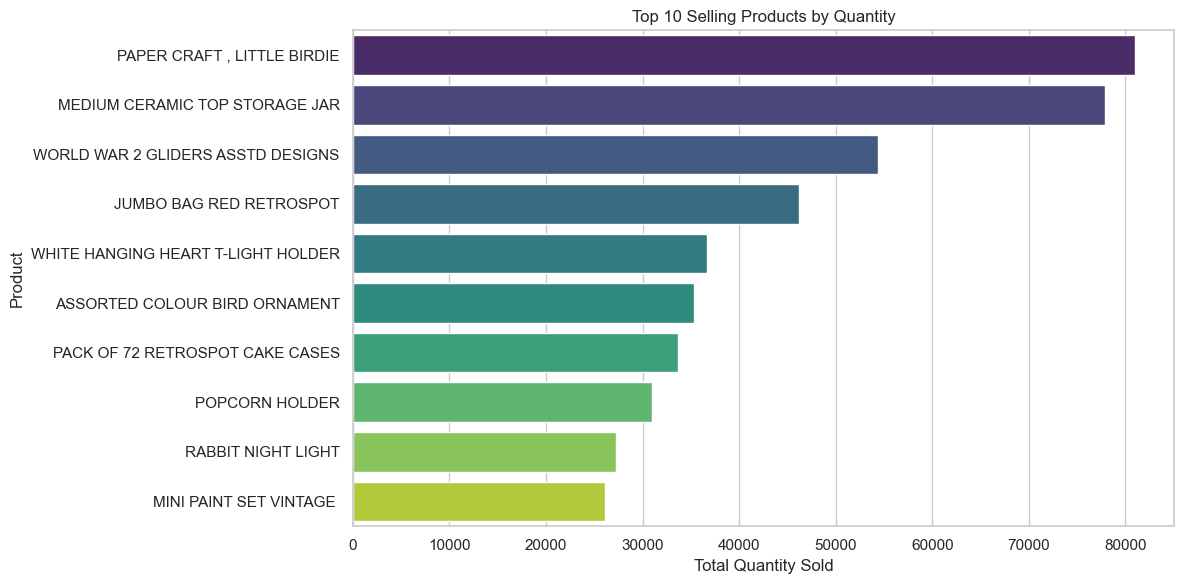

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()



Top 10 Products by Revenue

C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_11312\1550857418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette='magma')


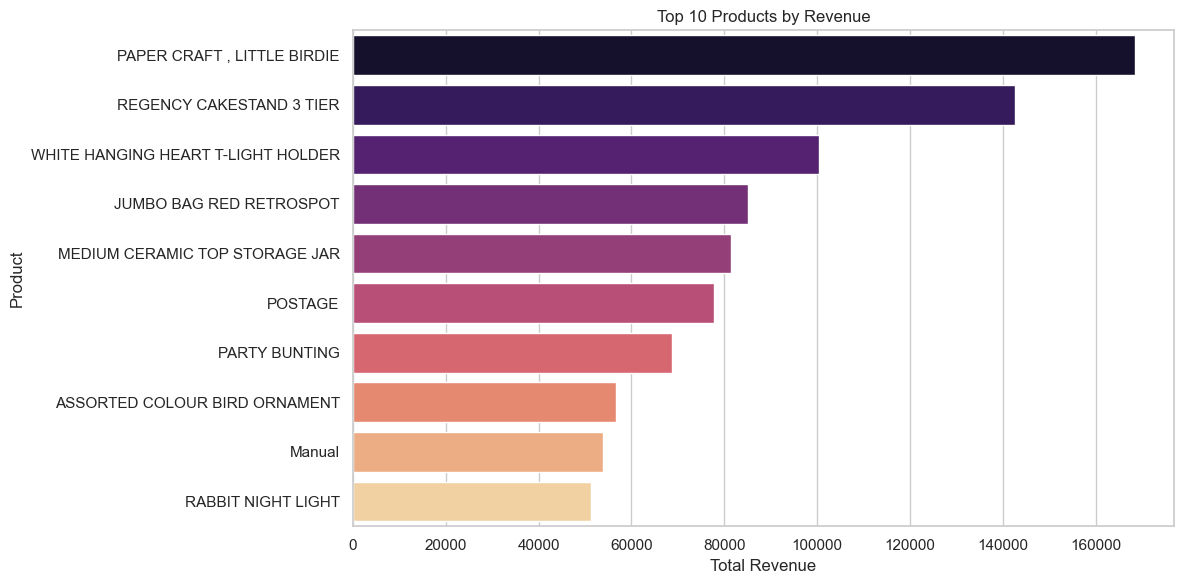

In [9]:
top_revenue_products = df.groupby('Product')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette='magma')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()







Monthly Revenue Trend

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Product      397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalAmount  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.3+ MB


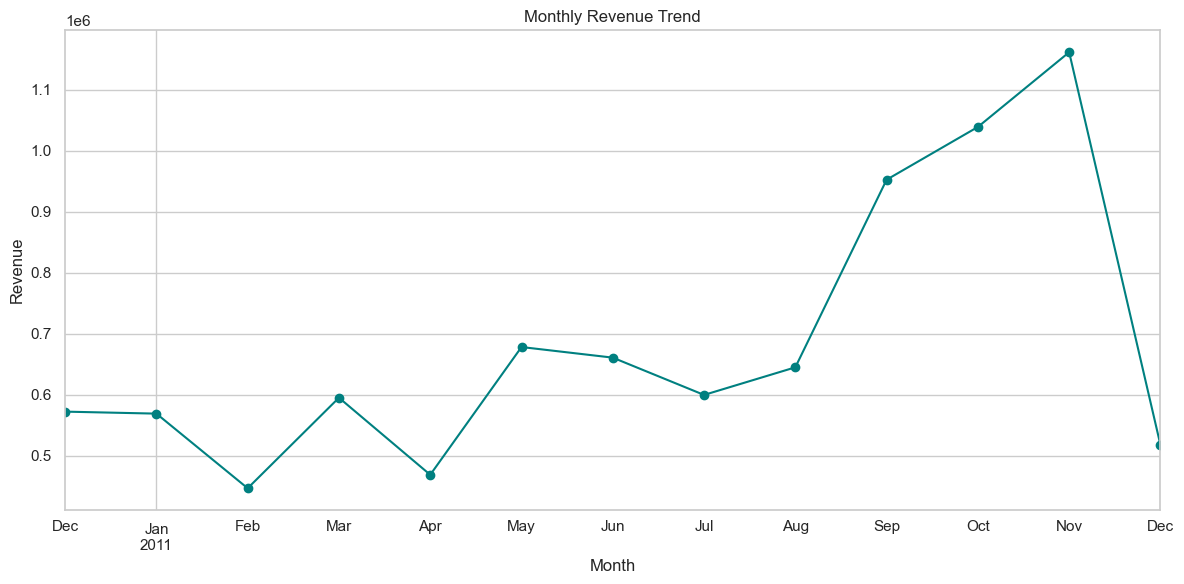

In [11]:
# Monthly revenue trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['TotalAmount'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 Customers by Revenue

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Product      397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalAmount  397884 non-null  float64       
 9   Month        397884 non-null  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 30.4+ MB


C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_11312\3815198362.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette="magma")


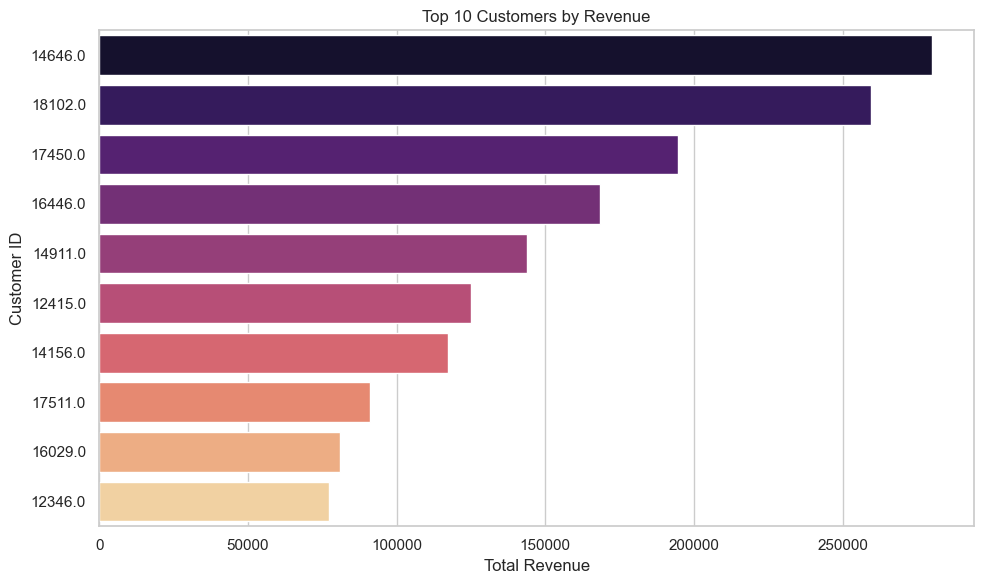

In [13]:
# Top 10 customers by total spend
top_customers = df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette="magma")
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()


# most essential EDA & visualizations

1. Monthly Revenue Trend

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Product      397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalAmount  397884 non-null  float64       
 9   Month        397884 non-null  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 30.4+ MB


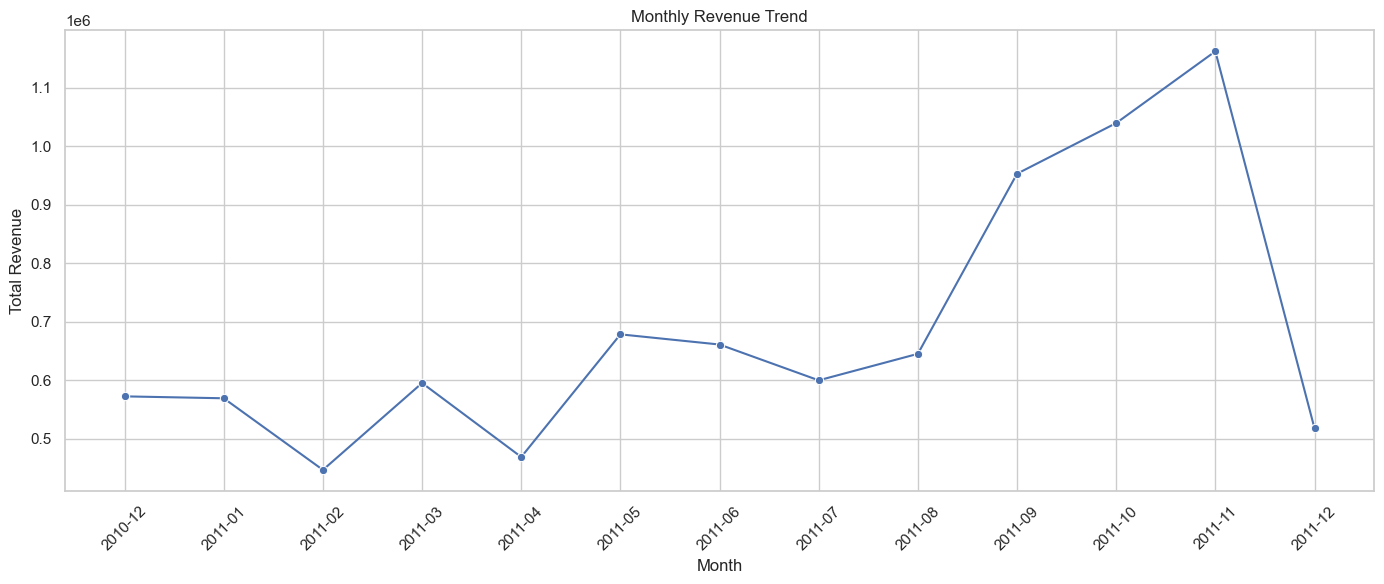

In [15]:
# Create 'Month' column
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by Month and calculate Revenue
monthly_revenue = df.groupby('InvoiceMonth')['TotalAmount'].sum().reset_index()
monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].astype(str)

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_revenue, x='InvoiceMonth', y='TotalAmount', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


2. Number of Unique Customers Over Time

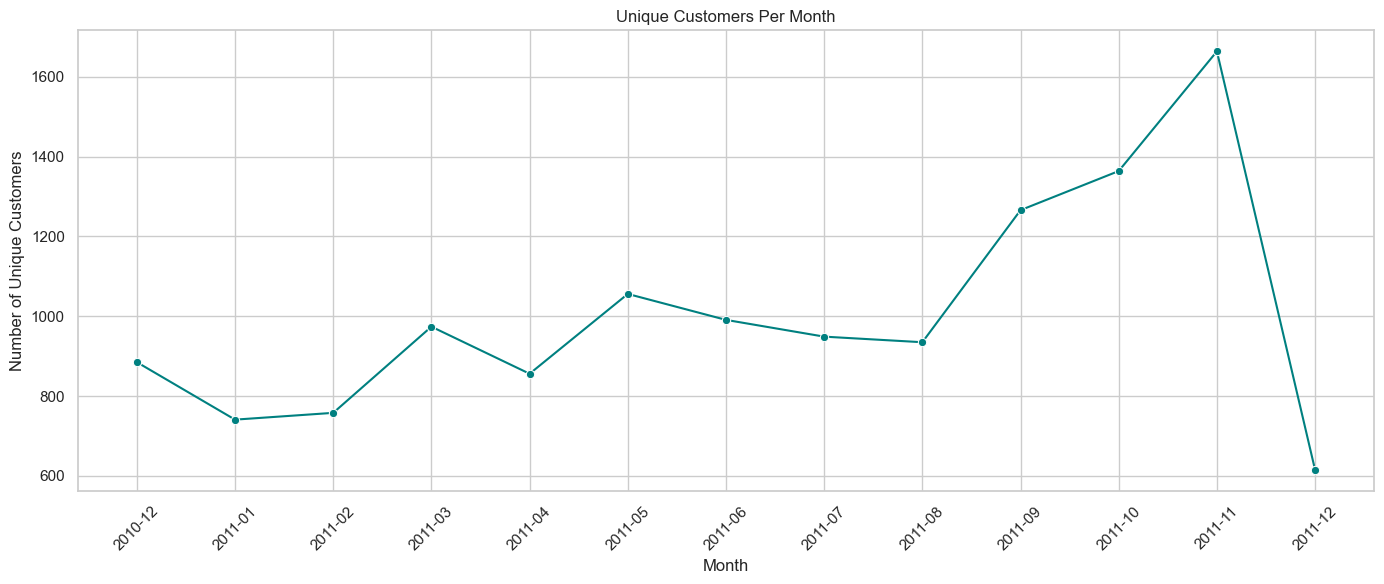

In [16]:
monthly_customers = df.groupby('InvoiceMonth')['CustomerID'].nunique().reset_index()
monthly_customers['InvoiceMonth'] = monthly_customers['InvoiceMonth'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_customers, x='InvoiceMonth', y='CustomerID', marker='o', color='teal')
plt.xticks(rotation=45)
plt.title('Unique Customers Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


3. Revenue by Country

C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_11312\805113445.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='coolwarm')


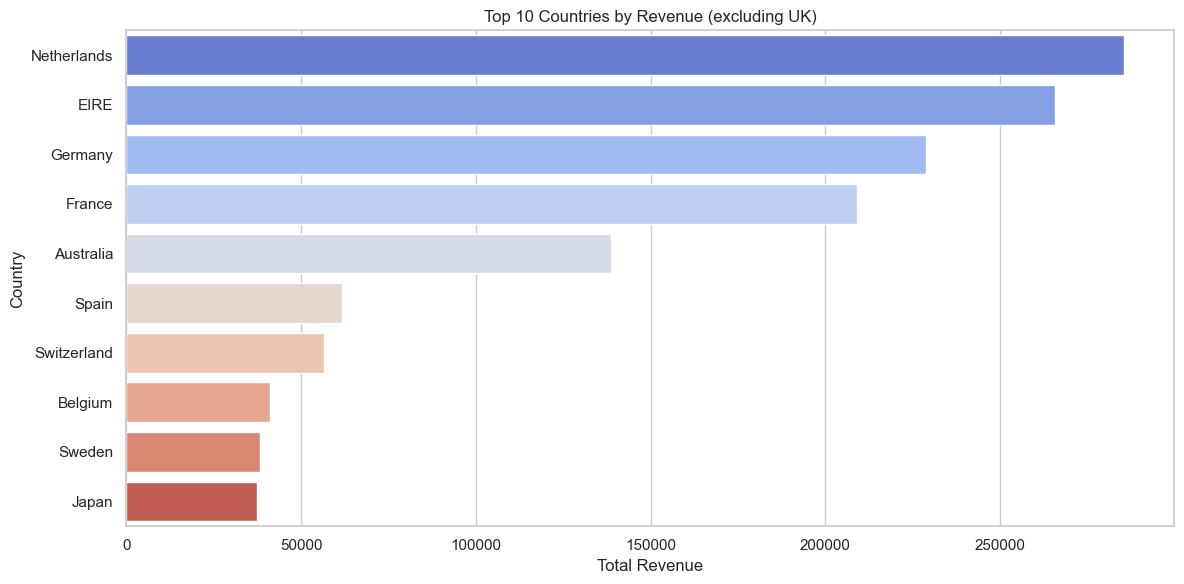

In [17]:
country_revenue = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).drop('United Kingdom').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='coolwarm')
plt.title('Top 10 Countries by Revenue (excluding UK)')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


4. Distribution of Purchase Amounts

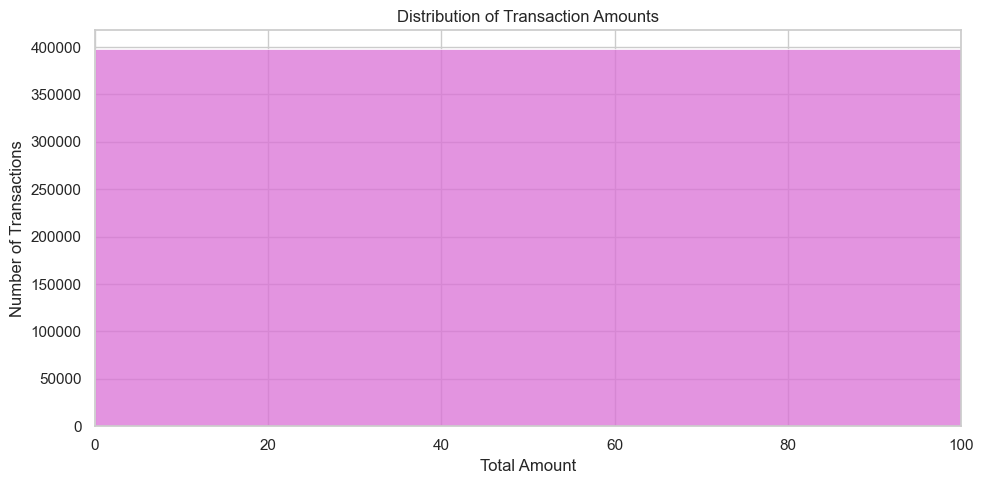

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['TotalAmount'], bins=100, color='orchid')
plt.xlim(0, 100)  # limit to focus on majority purchases
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Total Amount')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


# Customer Behavior Analysis using RFM Segmentation

RFM table creation


In [19]:
# Reference date is one day after the last invoice date
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by CustomerID and calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum'     # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display top 5
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.00,326,1,77183.60
1,12347.00,2,7,4310.00
2,12348.00,75,4,1797.24
3,12349.00,19,1,1757.55
4,12350.00,310,1,334.40


RFM Score Assignment (1 to 5)

In [20]:
# Score each column from 1 (worst) to 5 (best)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

# Combine RFM Score
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Preview
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,12346.00,326,1,77183.60,1,1,5,115,7
1,12347.00,2,7,4310.00,5,5,5,555,15
2,12348.00,75,4,1797.24,2,4,4,244,10
3,12349.00,19,1,1757.55,4,1,4,414,9
4,12350.00,310,1,334.40,1,1,2,112,4


Segmenting Customers

In [21]:
def segment_customer(df):
    if df['RFM_Score'] >= 9:
        return 'Champions'
    elif df['R_Score'] >= 4:
        return 'Loyal Customers'
    elif df['F_Score'] >= 4:
        return 'Frequent Buyers'
    elif df['M_Score'] >= 4:
        return 'Big Spenders'
    elif df['RFM_Score'] <= 4:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Count of each segment
rfm['Segment'].value_counts()



Segment
Champions          2277
Others             1102
At Risk             545
Loyal Customers     252
Big Spenders        104
Frequent Buyers      58
Name: count, dtype: int64

Segment Visualization

C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_11312\3838335430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='viridis')


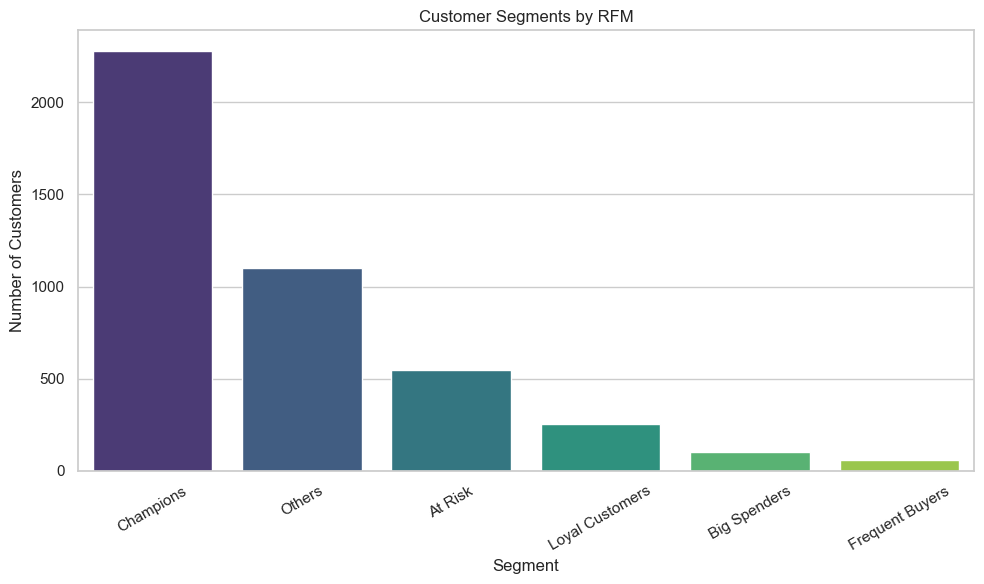

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='viridis')
plt.title('Customer Segments by RFM')
plt.ylabel('Number of Customers')
plt.xlabel('Segment')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Unsupervised Machine Learning: Customer Clustering (K-Means)

Normalize the RFM Data

In [23]:
from sklearn.preprocessing import StandardScaler

# Selecting only the RFM features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Normalize
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)


Determine Optimal Clusters with the Elbow Method


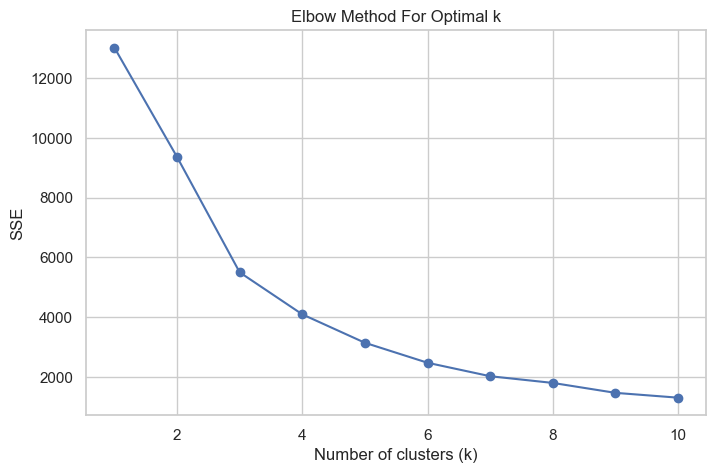

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()
# Optimal k appears to be around 3 or 4 based on the elbow curve


In [25]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Show first few rows
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment,Cluster
0,12346.00,326,1,77183.60,1,1,5,115,7,Big Spenders,3
1,12347.00,2,7,4310.00,5,5,5,555,15,Champions,0
2,12348.00,75,4,1797.24,2,4,4,244,10,Champions,0
3,12349.00,19,1,1757.55,4,1,4,414,9,Champions,0
4,12350.00,310,1,334.40,1,1,2,112,4,At Risk,1


Visualize Clusters

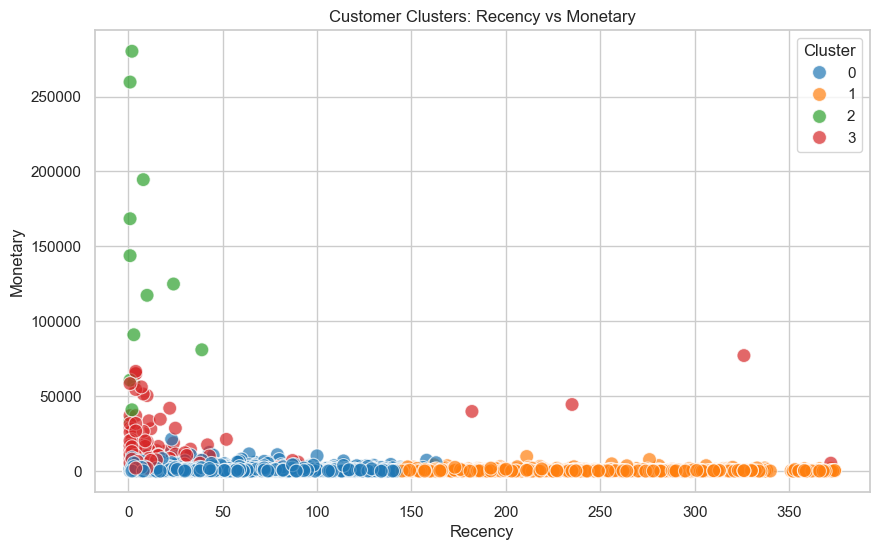

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm, x='Recency', y='Monetary', 
    hue='Cluster', palette='tab10', s=100, alpha=0.7
)
plt.title('Customer Clusters: Recency vs Monetary')
plt.show()


# Marketing Strategy Based on Customer Segments

Cluster Profiling

In [27]:
# Cluster Profiling
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_profile['Count'] = rfm['Cluster'].value_counts()
cluster_profile


,Recency,Frequency,Monetary,Count
Cluster,,,,
0,43.70,3.70,1359.00,3054
1,248.10,1.60,480.60,1067
2,7.40,82.50,127338.30,13
3,15.50,22.30,12709.10,204


# Label Segments Based on Behavior

Segment Interpretation & Strategies

- **Cluster 0 - At Risk**: Customers who haven’t purchased in a while. Send re-engagement emails or discount offers.
- **Cluster 1 - Loyal Customers**: High-frequency, high-monetary. Maintain relationships, reward loyalty.
- **Cluster 2 - New Customers**: High recency but low frequency. Onboard with welcome offers and brand info.
- **Cluster 3 - Big Spenders**: High monetary. VIP access, upsell premium products.


In [28]:
# Save final RFM with clusters
#rfm.to_csv('customer_segmentsfinal.csv', index=False)
#df.to_csv(r"C:\Users\Saurav Kumar\python files\UPWORK PROJECTS\Customer segmentation\archive\customer_segmentsfull.csv", index=False)

Interactive RFM Visualization Dashboard

In [29]:
import plotly.express as px
import plotly.graph_objects as go

# Scatter plot of Monetary vs Frequency, colored by Recency
fig = px.scatter(rfm,
                 x='Frequency',
                 y='Monetary',
                 color='Recency',
                 hover_data=['CustomerID'],
                 title='RFM Segmentation: Frequency vs Monetary colored by Recency',
                 color_continuous_scale='Viridis')
fig.update_layout(template='plotly_white')
fig.show()


 Heatmap of RFM Segments (Optional for quick insight)

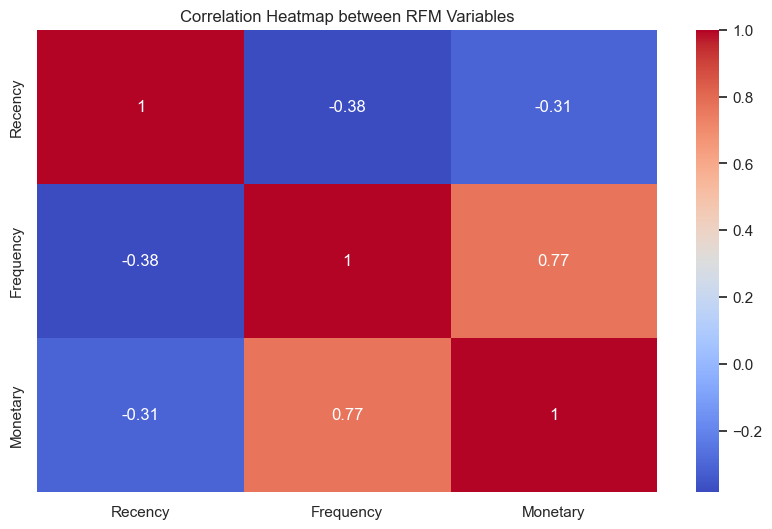

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

rfm_heatmap = rfm[['Recency', 'Frequency', 'Monetary']].copy()
rfm_heatmap = rfm_heatmap[rfm_heatmap < rfm_heatmap.quantile(0.99)]  # remove outliers

plt.figure(figsize=(10, 6))
sns.heatmap(rfm_heatmap.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between RFM Variables')
plt.show()
